# Vietnamese Handwritten Recognition with CRNN model

### Label_decoder

In [8]:
import numpy as np

def label_decoder(predictions, chars, length):
    # Initialize variables
    input_seq_len = len(predictions[0])  # Length of the predicted sequence
    blank_label = len(chars)  # Index of the blank label

    # Initialize a list to store the decoded texts
    decoded_texts = []

    for pred_seq in predictions:
        # Initialize a list to store the decoded text for the current sequence
        decoded_text = []

        # Initialize the previous label to be the blank label
        prev_label = blank_label

        # Iterate through the predicted labels for the sequence
        for label_list in pred_seq:
            # Ensure label_list is a list of integers
            label_list = [int(label) for label in label_list]

            # Skip consecutive duplicates and the blank label
            for label in label_list:
                if label != prev_label and label != blank_label:
                    decoded_text.append(chars[label])

                # Update the previous label
                prev_label = label

        # Combine consecutive duplicates and create a final decoded text
        decoded_texts.append(''.join(decoded_text))
    decoded_texts = decoded_texts[0][:length]
    return decoded_texts

# # Example usage:
predicted_labels = [[[2.3, 3, 4]]]
character_set = ['a','b','c','d','e']

decoded_labels = label_decoder(predicted_labels, character_set,1)
print(decoded_labels)
decoded_labels = label_decoder(predicted_labels, character_set,2)
print(decoded_labels)
decoded_labels = label_decoder(predicted_labels, character_set,3)
print(decoded_labels)
# print(char_list)


c
cd
cde


## Data Loader

#### Data to train and validate

#### Data which are have to predict

In [11]:
# Tập dữ liệu gốc (OCRDataset)
dataset_test = OCRDataset(root = root, max_label_len=32, train=False, transform = transform)

# Tạo DataLoader cho tập train và tập validation
batch_size = 8
unknown_dataloader = DataLoader(dataset_test, batch_size = batch_size, shuffle=False)
# In kích thước của các tập
print("Kích thước tập validation:", len(dataset_test))

Kích thước tập validation: 33000


## GET_CER

In [11]:
from mltu.utils.text_utils import get_cer
print(get_cer(['abcde'],['abcde']))
print(get_cer(['abcd2'],['abcde']))
print(get_cer(['abcde','abcd2'],['abcde','abcde']))

0.0
0.2
0.1


## Evaluation

In [134]:
import torch
# from model import CRNN
from torch.utils.data import Dataset, DataLoader
# from OCRDataset import OCRDataset
from torchvision.transforms import ToTensor,Compose,Resize
import numpy as np
import itertools

# char_list = OCRDataset(root,32)
# char_list = char_list.char_list

model_path = '/kaggle/input/handwriting/last_crnn (2).pt'
# root = '/kaggle/input/handwritten-ocr'


device = torch.device("cuda")
model = CRNN(num_classes=188).to(device)
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint['model'])

# model.load_state_dict(torch.load(model_path))
# model = torch.jit.load(model_path)
model.eval()

# train_dataloader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size = batch_size, shuffle=False)
# unknown_dataloader = DataLoader(dataset_test, batch_size = batch_size, shuffle=False)

print("Successfully")

Successfully


In [14]:
print(char_list)

['-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'À', 'Á', 'Â', 'Ã', 'È', 'É', 'Ê', 'Ì', 'Í', 'Ò', 'Ó', 'Ô', 'Õ', 'Ù', 'Ú', 'Ý', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'Ă', 'ă', 'Đ', 'đ', 'Ĩ', 'ĩ', 'Ũ', 'ũ', 'Ơ', 'ơ', 'Ư', 'ư', 'Ạ', 'ạ', 'Ả', 'ả', 'Ấ', 'ấ', 'Ầ', 'ầ', 'Ẩ', 'ẩ', 'Ẫ', 'ẫ', 'Ậ', 'ậ', 'Ắ', 'ắ', 'Ằ', 'ằ', 'Ẳ', 'ẳ', 'Ẵ', 'ẵ', 'Ặ', 'ặ', 'Ẹ', 'ẹ', 'Ẻ', 'ẻ', 'Ẽ', 'ẽ', 'Ế', 'ế', 'Ề', 'ề', 'Ể', 'ể', 'Ễ', 'ễ', 'Ệ', 'ệ', 'Ỉ', 'ỉ', 'Ị', 'ị', 'Ọ', 'ọ', 'Ỏ', 'ỏ', 'Ố', 'ố', 'Ồ', 'ồ', 'Ổ', 'ổ', 'Ỗ', 'ỗ', 'Ộ', 'ộ', 'Ớ', 'ớ', 'Ờ', 'ờ', 'Ở', 'ở', 'Ỡ', 'ỡ', 'Ợ', 'ợ', 'Ụ', 'ụ', 'Ủ', 'ủ', 'Ứ', 'ứ', 'Ừ', 'ừ', 'Ử', 'ử', 'Ữ', 'ữ', 'Ự', 'ự', 'Ỳ', 'ỳ', 'Ỵ', 'ỵ', 'Ỷ', 'ỷ', 'Ỹ', 'ỹ']


In [22]:
for images,true_label,length in val_dataloader:
    print(images)
    print(true_label)
    print(length)
    break
    

tensor([[[[0.8157, 0.8157, 0.8118,  ..., 0.6392, 0.6392, 0.6431],
          [0.8157, 0.8157, 0.8118,  ..., 0.6392, 0.6314, 0.6353],
          [0.8118, 0.8157, 0.8157,  ..., 0.6353, 0.6353, 0.6392],
          ...,
          [0.8157, 0.8235, 0.8235,  ..., 0.6275, 0.6392, 0.6353],
          [0.8078, 0.8196, 0.8235,  ..., 0.6235, 0.6353, 0.6275],
          [0.8157, 0.8235, 0.8196,  ..., 0.6275, 0.6314, 0.6275]]],


        [[[0.6706, 0.6784, 0.6588,  ..., 0.6627, 0.6824, 0.6471],
          [0.6510, 0.6824, 0.6706,  ..., 0.6784, 0.6784, 0.6667],
          [0.6745, 0.6667, 0.6941,  ..., 0.6588, 0.6549, 0.6471],
          ...,
          [0.6431, 0.5961, 0.6392,  ..., 0.6549, 0.6431, 0.6627],
          [0.6353, 0.6157, 0.6588,  ..., 0.6588, 0.6588, 0.6510],
          [0.6314, 0.6588, 0.6431,  ..., 0.6627, 0.6863, 0.6588]]],


        [[[0.6863, 0.6784, 0.6549,  ..., 0.7373, 0.7412, 0.7451],
          [0.6784, 0.6667, 0.6549,  ..., 0.7490, 0.7412, 0.7333],
          [0.6627, 0.6510, 0.6392,  ..

In [151]:
true_labels = []
predict_labels = []
for images,true_label,length in val_dataloader:
    predict_label = model(images.cuda())
#     for label in true_label:
#         true_labels.append(ctc_decoder([[[label]]],char_list, length))
#     for label in predict_label:
#         predict_labels.append(ctc_decoder([[[label]]],char_list, len(label)))
    print(predict_label.shape)
    true_label = true_label[0].cpu().detach().numpy()
    print(label_decoder([[true_label]], char_list, length[0]))
    break

torch.Size([32, 8, 188])
song


In [152]:
item = predict_label.cpu().permute(1,0,2).detach().numpy()[1]
item.shape

(32, 188)

## CTC_DECODER

In [153]:
import typing
import numpy as np
from itertools import groupby

def ctc_decoder(predictions: np.ndarray, chars: typing.Union[str, list]) -> typing.List[str]:
    """ CTC greedy decoder for predictions
    
    Args:
        predictions (np.ndarray): predictions from model
        chars (typing.Union[str, list]): list of characters

    Returns:
        typing.List[str]: list of words
    """
    # use argmax to find the index of the highest probability
    argmax_preds = np.argmax(predictions, axis=-1)
    
    # use groupby to find continuous same indexes
    grouped_preds = [[k for k,_ in groupby(preds)] for preds in argmax_preds]

    # convert indexes to chars
    texts = ["".join([chars[k] for k in group if k < len(chars)]) for group in grouped_preds]

    return texts

In [154]:
# print(ctc_decoder ([item], char_list))
predict_ = [[-1,-4,-5,-3]]
#             [1,2,4,3],
#             [15,23,2,5],
#             [1,2,3,5],
#             [3,2,1,2]]
char_list_ = ['a','b','c']
print(ctc_decoder ([predict_], char_list_))

['a']


In [155]:
from mltu.utils.text_utils import get_cer

print(get_cer(['acba'],['acbb']))
# print('CER =', get_cer(true_labels, predict_labels)

0.25


## ANSWER

In [ ]:
for images in unknown_dataloader:
    answer_label = model(images.cuda())
    for label in answer_label:
        pass
        # Ghi kết quả theo file txt


## TEST

In [184]:
x = 3
for images,true_label,length in val_dataloader:
    
    predict_label = model(images.cuda())
#     for label in true_label:
#         true_labels.append(ctc_decoder([[[label]]],char_list, length))
#     for label in predict_label:
#         predict_labels.append(ctc_decoder([[[label]]],char_list, len(label)))
    print(predict_label.shape)
    true_label = true_label[x].cpu().detach().numpy()
    print(label_decoder([[true_label]], char_list, length[x]))
    break

torch.Size([32, 8, 188])
thủ


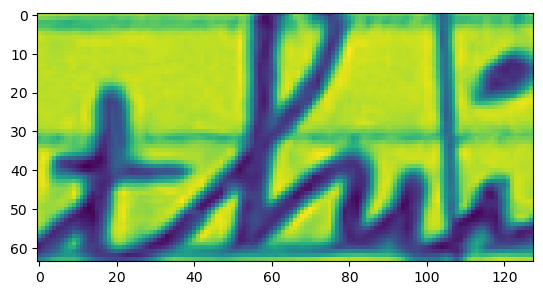

In [185]:
# images
import numpy as np
from PIL import Image
import torch
import matplotlib.pyplot as plt
# images[0][0].numpy()
plt.imshow(images[x][0].numpy())

In [186]:
item = predict_label.cpu().permute(1,0,2).detach().numpy()[x]
item

array([[-1.6974064e+01, -1.8570406e+01, -1.9407997e+01, ...,
        -2.8049828e+01, -2.5195005e+01, -9.2982809e-06],
       [-1.6786934e+01, -1.6094988e+01, -1.8777967e+01, ...,
        -2.8287298e+01, -2.5401012e+01, -9.4886091e-05],
       [-2.0409052e+01, -2.0413460e+01, -2.3078449e+01, ...,
        -3.5133743e+01, -3.1713116e+01, -2.9205850e-05],
       ...,
       [-1.4855786e+01, -1.6104897e+01, -1.9121262e+01, ...,
        -2.6903257e+01, -2.6942074e+01, -7.5621612e-04],
       [-1.5693771e+01, -1.6216179e+01, -1.7652184e+01, ...,
        -2.4578804e+01, -2.3757032e+01, -6.4370943e-05],
       [-2.3161221e+01, -2.2866068e+01, -2.3081936e+01, ...,
        -3.0016842e+01, -2.5817698e+01,  0.0000000e+00]], dtype=float32)

In [159]:
print(predict_label.cpu().detach().numpy()[0])

[[-1.5377227e+01 -1.9210073e+01 -2.0073305e+01 ... -2.3576559e+01
  -2.2316511e+01 -9.2982809e-06]
 [-1.5959626e+01 -1.8436808e+01 -1.9252348e+01 ... -2.6912367e+01
  -2.5489412e+01 -4.0531077e-06]
 [-1.7376127e+01 -2.0504532e+01 -2.0970943e+01 ... -2.6895737e+01
  -2.4554632e+01 -3.4570635e-06]
 ...
 [-1.6942989e+01 -1.9273266e+01 -1.9899229e+01 ... -2.8044529e+01
  -2.4977776e+01 -6.0796551e-06]
 [-1.5959874e+01 -1.9373421e+01 -1.9819651e+01 ... -2.6926313e+01
  -2.4614201e+01 -3.4570635e-06]
 [-1.6633570e+01 -1.9927595e+01 -1.9597244e+01 ... -2.9344746e+01
  -2.6020824e+01 -3.2186456e-06]]


In [187]:
print(ctc_decoder ([item], char_list))


['tthủ']


In [67]:
char_list = dataset.char_list
print(char_list)

['-', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'À', 'Á', 'Â', 'Ã', 'È', 'É', 'Ê', 'Ì', 'Í', 'Ò', 'Ó', 'Ô', 'Õ', 'Ù', 'Ú', 'Ý', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'Ă', 'ă', 'Đ', 'đ', 'Ĩ', 'ĩ', 'Ũ', 'ũ', 'Ơ', 'ơ', 'Ư', 'ư', 'Ạ', 'ạ', 'Ả', 'ả', 'Ấ', 'ấ', 'Ầ', 'ầ', 'Ẩ', 'ẩ', 'Ẫ', 'ẫ', 'Ậ', 'ậ', 'Ắ', 'ắ', 'Ằ', 'ằ', 'Ẳ', 'ẳ', 'Ẵ', 'ẵ', 'Ặ', 'ặ', 'Ẹ', 'ẹ', 'Ẻ', 'ẻ', 'Ẽ', 'ẽ', 'Ế', 'ế', 'Ề', 'ề', 'Ể', 'ể', 'Ễ', 'ễ', 'Ệ', 'ệ', 'Ỉ', 'ỉ', 'Ị', 'ị', 'Ọ', 'ọ', 'Ỏ', 'ỏ', 'Ố', 'ố', 'Ồ', 'ồ', 'Ổ', 'ổ', 'Ỗ', 'ỗ', 'Ộ', 'ộ', 'Ớ', 'ớ', 'Ờ', 'ờ', 'Ở', 'ở', 'Ỡ', 'ỡ', 'Ợ', 'ợ', 'Ụ', 'ụ', 'Ủ', 'ủ', 'Ứ', 'ứ', 'Ừ', 'ừ', 'Ử', 'ử', 'Ữ', 'ữ', 'Ự', 'ự', 'Ỳ', 'ỳ', 'Ỵ', 'ỵ', 'Ỷ', 'ỷ', 'Ỹ', 'ỹ']
